# Detección de Fraude en Transacciones de Tarjeta de Crédito
## Metodología CRISP-DM

---

**Dataset:** Credit Card Fraud Detection
**Fuente:** [Kaggle - Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

---

## Tabla de Contenidos

1. [Comprensión del Negocio](#1-comprension-negocio)
2. [Comprensión de los Datos](#2-comprension-datos)
3. [Preparación de los Datos](#3-preparacion-datos)
4. [Modelado](#4-modelado)
5. [Evaluación](#5-evaluacion)
6. [Conclusiones](#6-conclusiones)

---
# 1. Comprensión del Negocio <a id='1-comprension-negocio'></a>

## Contexto del Problema

El **fraude en transacciones con tarjetas de crédito** representa uno de los desafíos más críticos para las instituciones financieras a nivel mundial. Según estimaciones de la industria, las pérdidas globales por fraude con tarjetas de crédito superan los miles de millones de dólares anuales, afectando tanto a los consumidores como a las entidades emisoras.

### Por qué es importante?

1. **Impacto Financiero Directo:**
   - Pérdidas monetarias significativas para bancos y comercios
   - Costos de reembolso y gestión de disputas
   - Deterioro de la confianza del consumidor

2. **Experiencia del Cliente:**
   - Detección temprana evita inconvenientes a los usuarios legítimos
   - Reducción de falsos positivos mejora la satisfacción del cliente
   - Protección de la reputación de la marca

3. **Cumplimiento Regulatorio:**
   - Obligaciones legales de protección al consumidor
   - Normativas PCI-DSS y estándares de seguridad
   - Prevención de lavado de dinero

## Objetivo del Proyecto

Desarrollar un **modelo de clasificación binaria** capaz de identificar transacciones fraudulentas en tiempo real, utilizando técnicas avanzadas de Machine Learning.

### Variable Objetivo

- **Variable:** `Class`
- **Tipo:** Binaria categórica
- **Valores:**
  - `0` = Transacción legítima (no fraude)
  - `1` = Transacción fraudulenta (fraude)

### Problema de Clasificación

Este es un problema de **clasificación supervisada**, donde el modelo aprende patrones históricos de transacciones etiquetadas (fraudulentas o legítimas) para predecir el comportamiento de nuevas transacciones.

**Interpretación:**
- **Verdadero Positivo (TP):** Detectar correctamente una transacción fraudulenta
- **Verdadero Negativo (TN):** Identificar correctamente una transacción legítima
- **Falso Positivo (FP):** Marcar erróneamente una transacción legítima como fraude (inconveniente para el cliente)
- **Falso Negativo (FN):** No detectar una transacción fraudulenta (pérdida financiera directa)

## Retos Principales del Dataset

### 1. Desbalance Extremo de Clases
- El fraude representa típicamente **menos del 0.2%** de todas las transacciones
- Los modelos tienden a sesgo hacia la clase mayoritaria
- Requiere técnicas especializadas de balanceo (SMOTE, undersampling, etc.)

### 2. Anonimización mediante PCA
- Por razones de **confidencialidad**, las variables originales han sido transformadas
- Variables V1-V28 son componentes principales resultantes de PCA
- **Limitación:** No podemos interpretar el significado de negocio de cada variable
- **Ventaja:** Los datos están ya en un espacio reducido y optimizado

### 3. Variables sin Transformar
- `Time`: Tiempo transcurrido desde la primera transacción (segundos)
- `Amount`: Monto de la transacción
- Estas requieren **normalización/estandarización** para uniformar escalas

### 4. Métricas de Evaluación Especiales
- **Accuracy NO es apropiado** debido al desbalance
- Debemos enfocarnos en:
  - **Precision:** Cuántos fraudes detectados son realmente fraudes?
  - **Recall (Sensibilidad):** Cuántos fraudes reales logramos detectar?
  - **F1-Score:** Balance entre Precision y Recall
  - **AUC-ROC:** Capacidad de discriminación del modelo

### 5. Costos Asimétricos
- Un **Falso Negativo** (fraude no detectado) tiene mayor costo que un **Falso Positivo**
- El modelo debe priorizar **Recall** sin sacrificar excesivamente **Precision**

---

## Resumen - Fase de Comprensión del Negocio

| Aspecto | Descripción |
|---------|-------------|
| **Problema** | Clasificación binaria de transacciones fraudulentas |
| **Variable Objetivo** | `Class` (0 = legítima, 1 = fraude) |
| **Principal Desafío** | Desbalance extremo (~0.2% fraude) |
| **Datos Transformados** | V1-V28 (PCA), Time y Amount sin transformar |
| **Métrica Clave** | Recall y F1-Score (no Accuracy) |
| **Impacto** | Protección financiera y confianza del cliente |


In [55]:
pip install pandas numpy matplotlib seaborn kagglehub scikit-learn imbalanced-learn xgboost lightgbm


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 7.3 MB/s eta 0:00:10
   - -------------------------------------- 3.4/72.0 MB 10.7 MB/s eta 0:00:07
   -- ------------------------------------- 4.5/72.0 MB 8.3 MB/s eta 0:00:09
   --- ------------------------------------ 6.6/72.0 MB 8.9 MB/s eta 0:00:08
   ---- ----------------------------------- 8.4/72.0 MB 8.8 MB/s eta 0:00:08
   ----- ---------------------------------- 10.5/72.0 MB 9.1 MB/s eta 0:00:07
   ------ --------------------------------- 12.1/72.0 MB 8.9 MB/s eta 0:00:07
   ------- -------------------------------- 13.4/72.0 MB 8.6 MB/s eta 0:00:07
   -------- ------------------------------- 14.7/72.0 MB 8.3 MB/s eta 0:00:07
   --------- ------------------------------ 16.3/72.0 MB 8.3 MB/s eta 0:00:07
   ---------- ----------------------------- 18.1/72.0 MB 8.4 MB/s eta 0:00:07
   ----------- ---------------------------- 20.4/72.0 MB 8.5 MB/s eta 0:00:0

---
# 2. Comprensión de los Datos <a id='2-comprension-datos'></a>

En esta fase exploramos el dataset para entender su estructura, distribuciones, calidad y características principales.

In [56]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kagglehub
from kagglehub import KaggleDatasetAdapter


# Configuración de visualización
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

print("Librerías importadas correctamente")

Librerías importadas correctamente


## Carga del Dataset

**Nota:** Asegúrate de descargar el dataset desde Kaggle y colocarlo en la ruta correcta.

In [57]:
# Cargar el dataset
# Ajusta la ruta según donde hayas descargado el archivo
file_path = r"C:\Users\marianaH\Documents\Proyecto_Final\Files\creditcard.csv"

df = pd.read_csv(file_path)

print(df.head())
print("Dataset cargado exitosamente")

    Time      V1      V2     V3      V4      V5      V6      V7      V8  \
0 0.0000 -1.3598 -0.0728 2.5363  1.3782 -0.3383  0.4624  0.2396  0.0987   
1 0.0000  1.1919  0.2662 0.1665  0.4482  0.0600 -0.0824 -0.0788  0.0851   
2 1.0000 -1.3584 -1.3402 1.7732  0.3798 -0.5032  1.8005  0.7915  0.2477   
3 1.0000 -0.9663 -0.1852 1.7930 -0.8633 -0.0103  1.2472  0.2376  0.3774   
4 2.0000 -1.1582  0.8777 1.5487  0.4030 -0.4072  0.0959  0.5929 -0.2705   

       V9     V10     V11     V12     V13     V14     V15     V16     V17  \
0  0.3638  0.0908 -0.5516 -0.6178 -0.9914 -0.3112  1.4682 -0.4704  0.2080   
1 -0.2554 -0.1670  1.6127  1.0652  0.4891 -0.1438  0.6356  0.4639 -0.1148   
2 -1.5147  0.2076  0.6245  0.0661  0.7173 -0.1659  2.3459 -2.8901  1.1100   
3 -1.3870 -0.0550 -0.2265  0.1782  0.5078 -0.2879 -0.6314 -1.0596 -0.6841   
4  0.8177  0.7531 -0.8228  0.5382  1.3459 -1.1197  0.1751 -0.4514 -0.2370   

      V18     V19     V20     V21     V22     V23     V24     V25     V26  \
0  0.0258

## Exploración Inicial

In [58]:
# Primeras filas del dataset
print("\nPrimeras 5 filas del dataset:")
df.head()


Primeras 5 filas del dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [59]:
# Información general del dataset
print("\nInformación General del Dataset:")
df.info()


Información General del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807

In [60]:
# Estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
df.describe()


Estadísticas Descriptivas:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,1.0888,1.0207,0.9992,0.9953,0.9586,0.9153,0.8763,0.8493,0.8382,0.8140,0.7709,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,-4.7975,-18.6837,-5.7919,-19.2143,-4.4989,-14.1299,-25.1628,-9.4987,-7.2135,-54.4977,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,-0.5354,-0.7625,-0.4056,-0.6485,-0.4256,-0.5829,-0.4680,-0.4837,-0.4988,-0.4563,-0.2117,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,-0.0929,-0.0328,0.1400,-0.0136,0.0506,0.0481,0.0664,-0.0657,-0.0036,0.0037,-0.0625,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,0.4539,0.7396,0.6182,0.6625,0.4931,0.6488,0.5233,0.3997,0.5008,0.4589,0.1330,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,12.0189,7.8484,7.1269,10.5268,8.8777,17.3151,9.2535,5.0411,5.5920,39.4209,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


## Descripción de las Variables

| Variable | Descripción | Tipo |
|----------|-------------|------|
| **Time** | Tiempo transcurrido (segundos) desde la primera transacción | Numérica continua |
| **V1 - V28** | Componentes principales obtenidos mediante PCA (confidenciales) | Numérica continua |
| **Amount** | Monto de la transacción | Numérica continua |
| **Class** | Variable objetivo (0 = No Fraude, 1 = Fraude) | Categórica binaria |

### Naturaleza de los Datos

**Transformación PCA (Principal Component Analysis):**
- Por motivos de **confidencialidad y privacidad**, las características originales han sido transformadas
- Las variables V1-V28 representan **componentes principales** que capturan la mayor varianza de los datos originales
- **Implicación:** No podemos interpretar el significado de negocio individual de cada variable
- **Ventaja:** Los datos ya están en un espacio optimizado y decorrelacionado

**Variables sin transformar:**
- `Time` y `Amount` conservan su escala original
- Requieren normalización para homogeneizar con las variables PCA

## Análisis de la Variable Objetivo (Class)

In [61]:
# Distribución de la variable objetivo
print("\nDistribución de la Variable Objetivo (Class):")
print("="*60)

class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

distribution_df = pd.DataFrame({
    'Clase': ['No Fraude (0)', 'Fraude (1)'],
    'Cantidad': class_counts.values,
    'Porcentaje': class_percentages.values
})

print(distribution_df.to_string(index=False))
print("\nDESBALANCE EXTREMO DETECTADO")
print(f"Ratio de desbalance: 1:{int(class_counts[0]/class_counts[1])}")
print(f"Por cada transacción fraudulenta, hay {int(class_counts[0]/class_counts[1])} transacciones legítimas")


Distribución de la Variable Objetivo (Class):
        Clase  Cantidad  Porcentaje
No Fraude (0)    284315     99.8273
   Fraude (1)       492      0.1727

DESBALANCE EXTREMO DETECTADO
Ratio de desbalance: 1:577
Por cada transacción fraudulenta, hay 577 transacciones legítimas


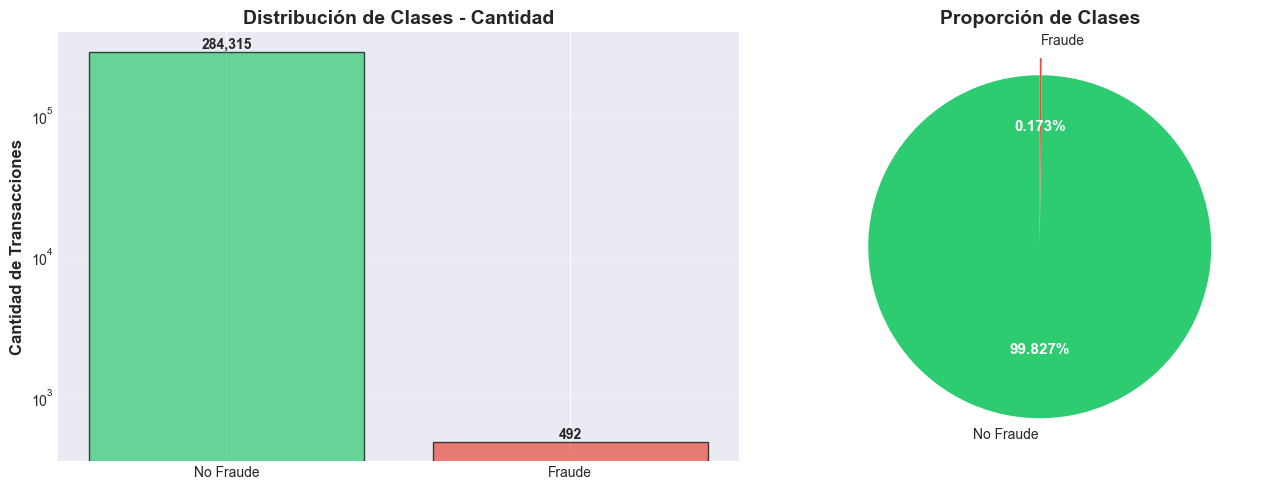


Observación: El desbalance extremo requiere técnicas especiales de muestreo (SMOTE, undersampling)


In [62]:
# Visualización de la distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
ax1 = axes[0]
colors = ['#2ecc71', '#e74c3c']
bars = ax1.bar(['No Fraude', 'Fraude'], class_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Cantidad de Transacciones', fontsize=12, fontweight='bold')
ax1.set_title('Distribución de Clases - Cantidad', fontsize=14, fontweight='bold')
ax1.set_yscale('log')  # Escala logarítmica por el desbalance
ax1.grid(axis='y', alpha=0.3)

# Añadir valores sobre las barras
for bar, count in zip(bars, class_counts.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}',
             ha='center', va='bottom', fontweight='bold')

# Gráfico de pie
ax2 = axes[1]
wedges, texts, autotexts = ax2.pie(class_counts.values,
                                     labels=['No Fraude', 'Fraude'],
                                     colors=colors,
                                     autopct='%1.3f%%',
                                     startangle=90,
                                     explode=(0, 0.1))
ax2.set_title('Proporción de Clases', fontsize=14, fontweight='bold')

# Mejorar texto
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.show()

print("\nObservación: El desbalance extremo requiere técnicas especiales de muestreo (SMOTE, undersampling)")

## Análisis de Valores Faltantes

In [63]:
# Verificar valores faltantes
print("\nAnálisis de Valores Faltantes:")
print("="*60)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Variable': df.columns,
    'Valores Faltantes': missing_values.values,
    'Porcentaje': missing_percentage.values
})

missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)

if missing_df.empty:
    print("\nNo se encontraron valores faltantes en el dataset")
else:
    print(missing_df.to_string(index=False))


Análisis de Valores Faltantes:

No se encontraron valores faltantes en el dataset


## Análisis de Outliers

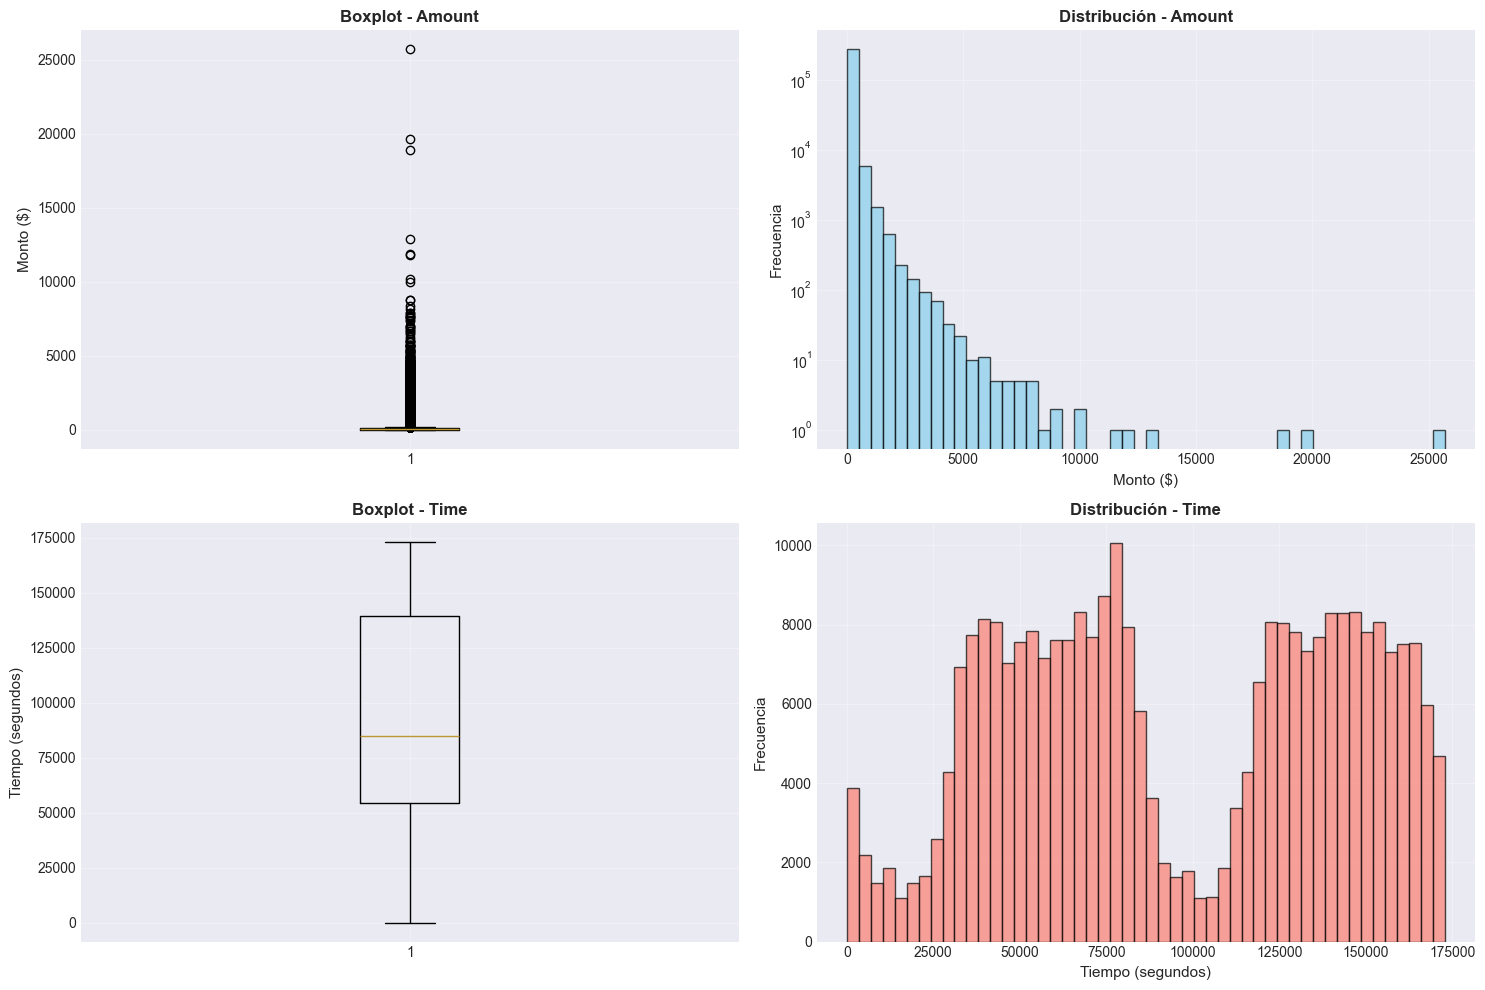


Observaciones:
   - Amount presenta valores extremadamente altos (outliers)
   - La mayoría de transacciones tienen montos bajos
   - Time muestra distribución aproximadamente uniforme (transacciones en 2 días)


In [64]:
# Análisis de outliers en Amount y Time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Amount - Boxplot
axes[0, 0].boxplot(df['Amount'], vert=True)
axes[0, 0].set_title('Boxplot - Amount', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Monto ($)', fontsize=11)
axes[0, 0].grid(alpha=0.3)

# Amount - Histograma
axes[0, 1].hist(df['Amount'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribución - Amount', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Monto ($)', fontsize=11)
axes[0, 1].set_ylabel('Frecuencia', fontsize=11)
axes[0, 1].set_yscale('log')
axes[0, 1].grid(alpha=0.3)

# Time - Boxplot
axes[1, 0].boxplot(df['Time'], vert=True)
axes[1, 0].set_title('Boxplot - Time', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Tiempo (segundos)', fontsize=11)
axes[1, 0].grid(alpha=0.3)

# Time - Histograma
axes[1, 1].hist(df['Time'], bins=50, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribución - Time', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Tiempo (segundos)', fontsize=11)
axes[1, 1].set_ylabel('Frecuencia', fontsize=11)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservaciones:")
print("   - Amount presenta valores extremadamente altos (outliers)")
print("   - La mayoría de transacciones tienen montos bajos")
print("   - Time muestra distribución aproximadamente uniforme (transacciones en 2 días)")

In [65]:
# Estadísticas de Amount por clase
print("\nEstadísticas de Amount por Clase:")
print("="*60)
print("\nNo Fraude:")
print(df[df['Class'] == 0]['Amount'].describe())
print("\nFraude:")
print(df[df['Class'] == 1]['Amount'].describe())


Estadísticas de Amount por Clase:

No Fraude:
count   284315.0000
mean        88.2910
std        250.1051
min          0.0000
25%          5.6500
50%         22.0000
75%         77.0500
max      25691.1600
Name: Amount, dtype: float64

Fraude:
count    492.0000
mean     122.2113
std      256.6833
min        0.0000
25%        1.0000
50%        9.2500
75%      105.8900
max     2125.8700
Name: Amount, dtype: float64


## Distribución de Variables (Histogramas)

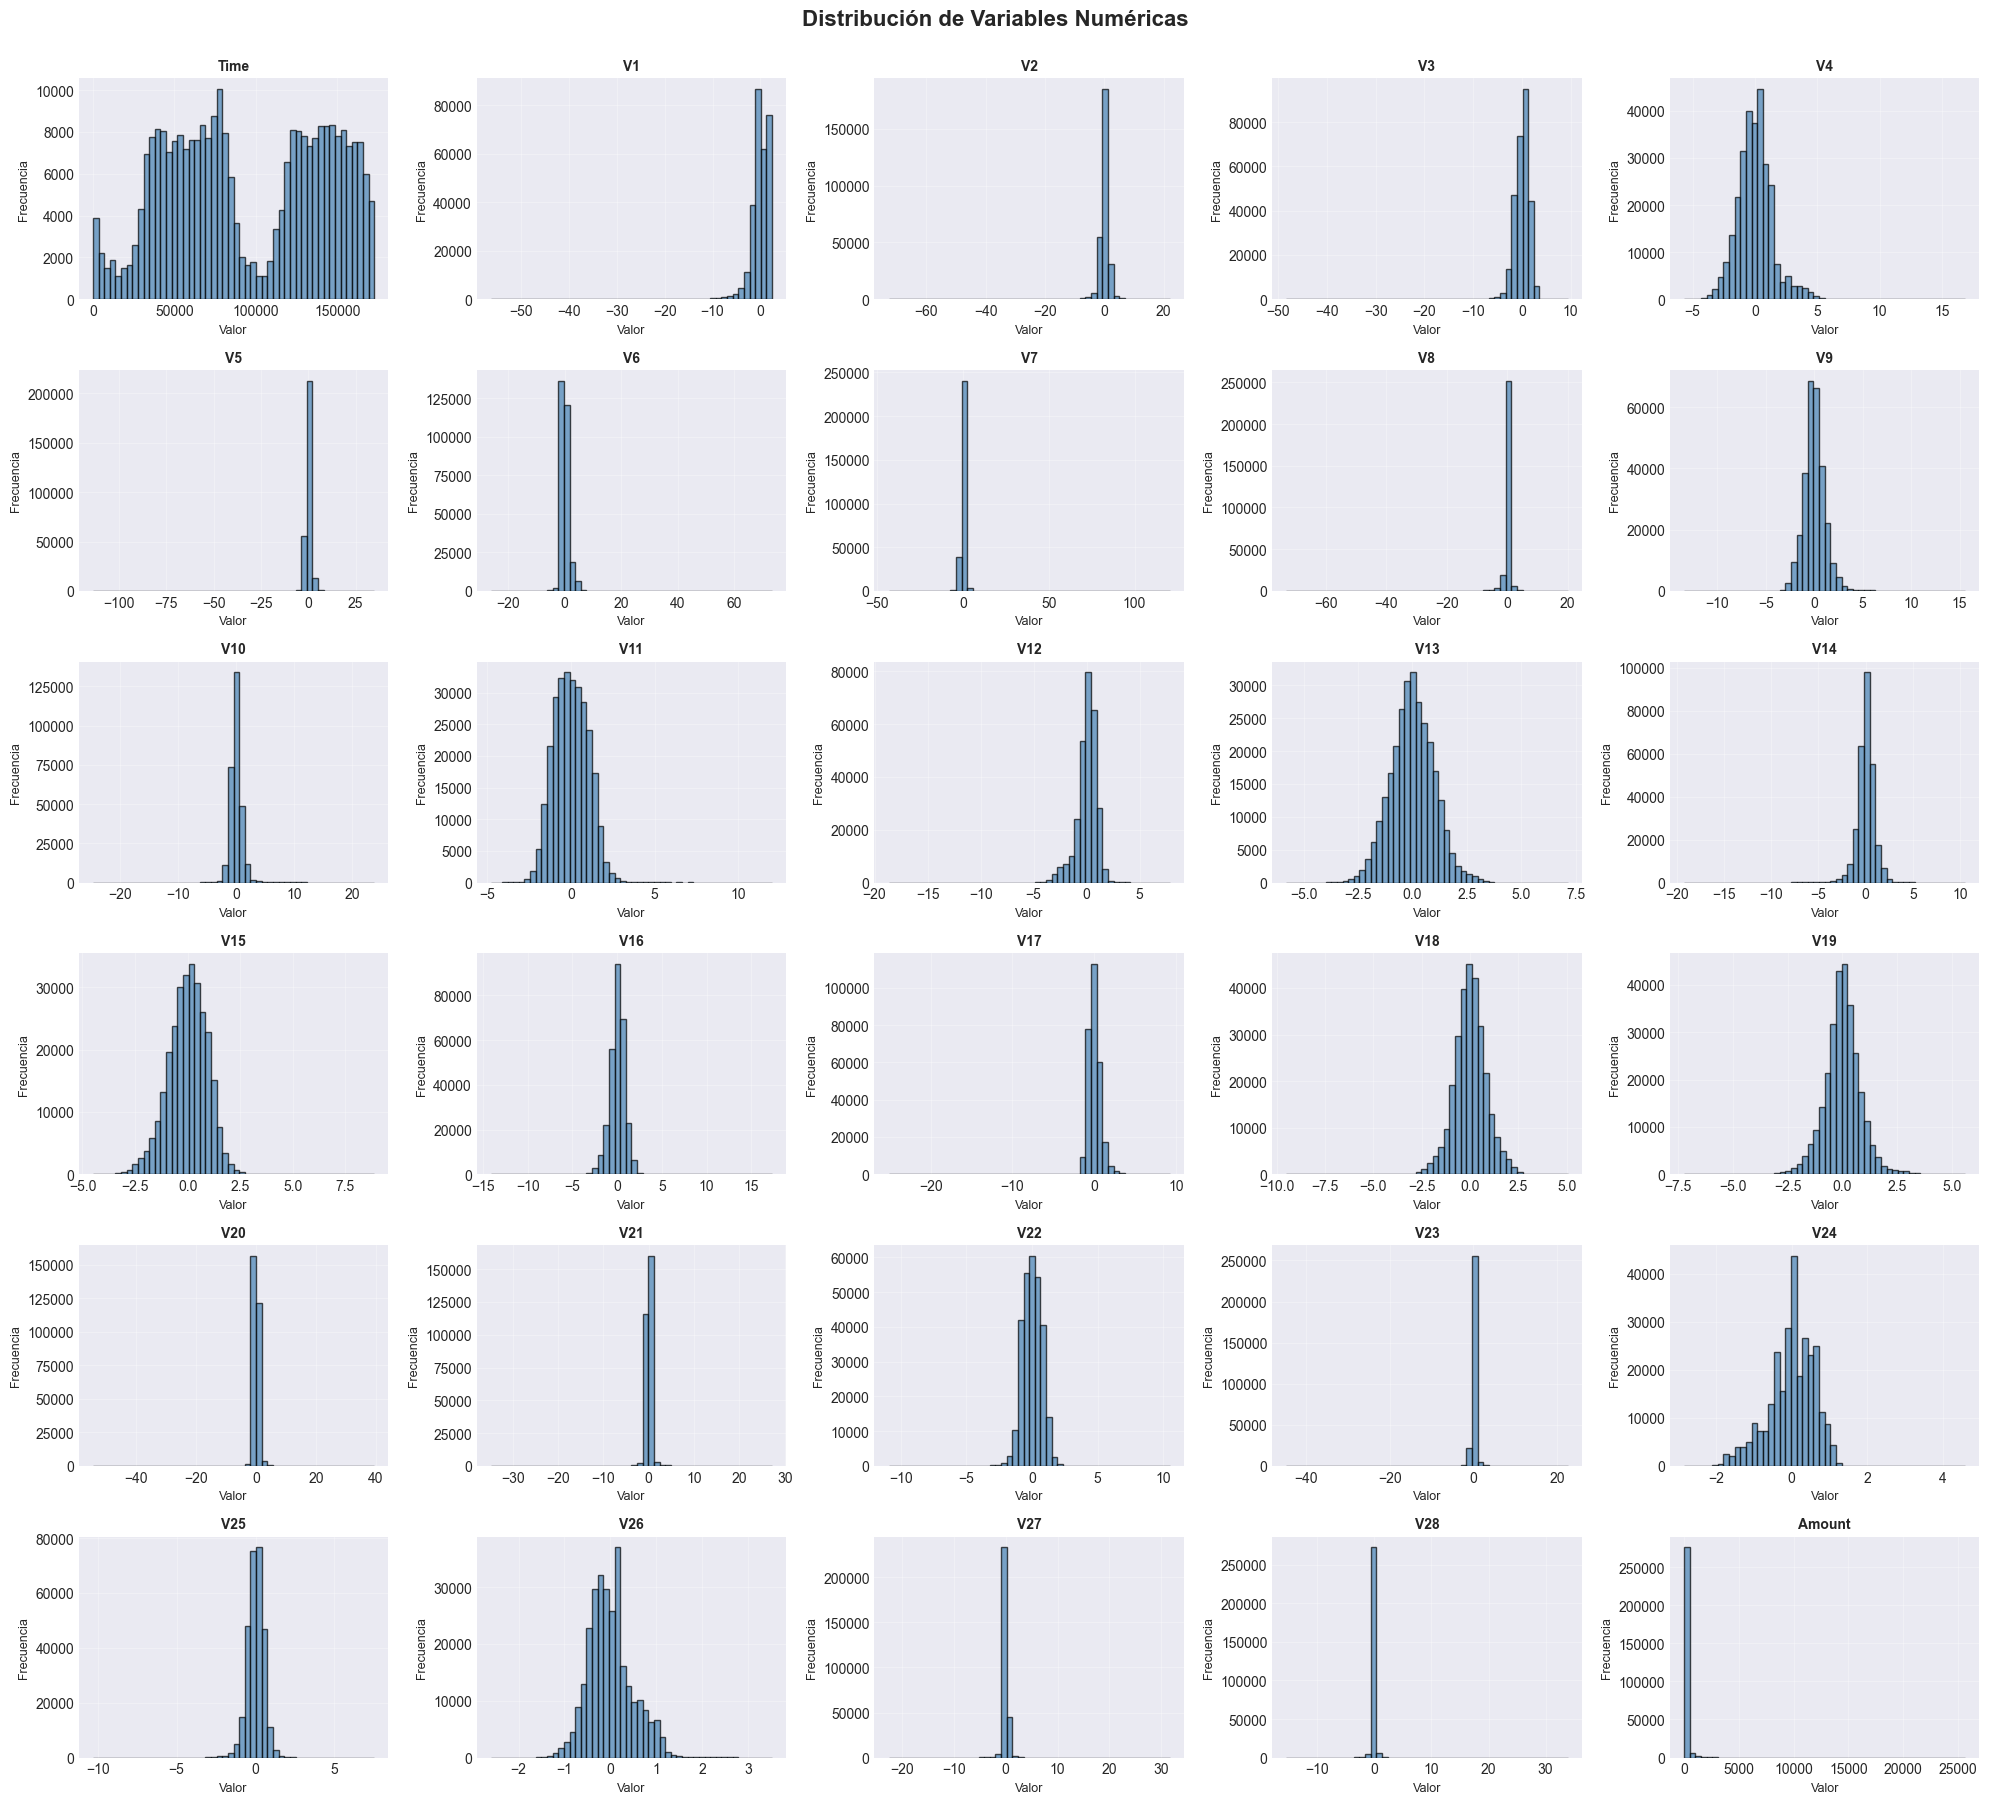


Observaciones:
   - Variables V1-V28 (PCA) muestran distribuciones aproximadamente normales
   - Amount tiene distribución muy sesgada hacia la derecha (pocos valores altos)
   - Time muestra distribución bimodal (períodos de actividad)


In [66]:
# Histogramas de todas las variables numéricas
# Excluimos Class ya que es categórica
numerical_features = df.columns.drop('Class')

# Debido a que son 30 variables, las dividiremos en grupos
n_cols = 5
n_rows = int(np.ceil(len(numerical_features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Valor', fontsize=9)
    axes[idx].set_ylabel('Frecuencia', fontsize=9)
    axes[idx].grid(alpha=0.3)

# Ocultar ejes sobrantes
for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribución de Variables Numéricas', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\nObservaciones:")
print("   - Variables V1-V28 (PCA) muestran distribuciones aproximadamente normales")
print("   - Amount tiene distribución muy sesgada hacia la derecha (pocos valores altos)")
print("   - Time muestra distribución bimodal (períodos de actividad)")

## Matriz de Correlación

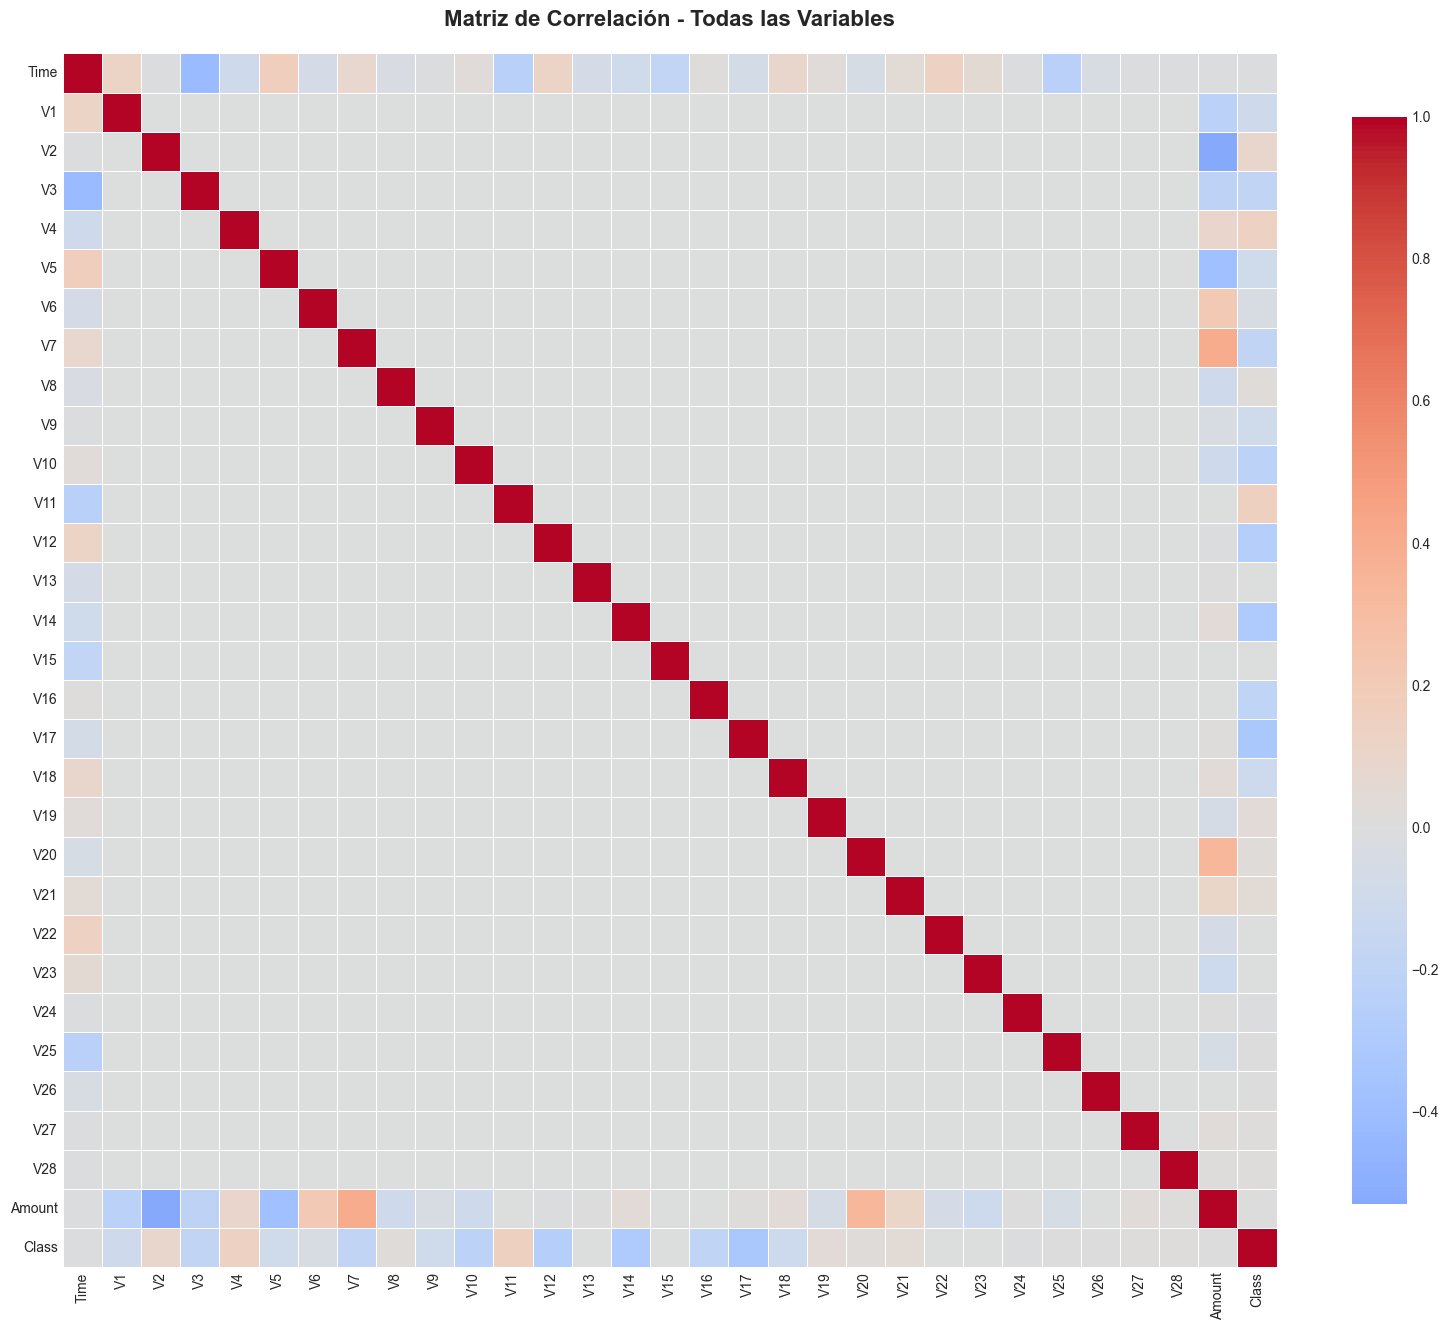


Observación: Al ser variables obtenidas por PCA, la mayoría están decorrelacionadas
   (los componentes principales son ortogonales por diseño)


In [67]:
# Calcular matriz de correlación
correlation_matrix = df.corr()

# Visualizar matriz de correlación completa
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot=False)  # No anotamos por la cantidad de variables

plt.title('Matriz de Correlación - Todas las Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nObservación: Al ser variables obtenidas por PCA, la mayoría están decorrelacionadas")
print("   (los componentes principales son ortogonales por diseño)")


Correlación de Variables con Class (Variable Objetivo):
Class     1.0000
V11       0.1549
V4        0.1334
V2        0.0913
V21       0.0404
V19       0.0348
V20       0.0201
V8        0.0199
V27       0.0176
V28       0.0095
Amount    0.0056
V26       0.0045
V25       0.0033
V22       0.0008
V23      -0.0027
V15      -0.0042
V13      -0.0046
V24      -0.0072
Time     -0.0123
V6       -0.0436
V5       -0.0950
V9       -0.0977
V1       -0.1013
V18      -0.1115
V7       -0.1873
V3       -0.1930
V16      -0.1965
V10      -0.2169
V12      -0.2606
V14      -0.3025
V17      -0.3265
Name: Class, dtype: float64


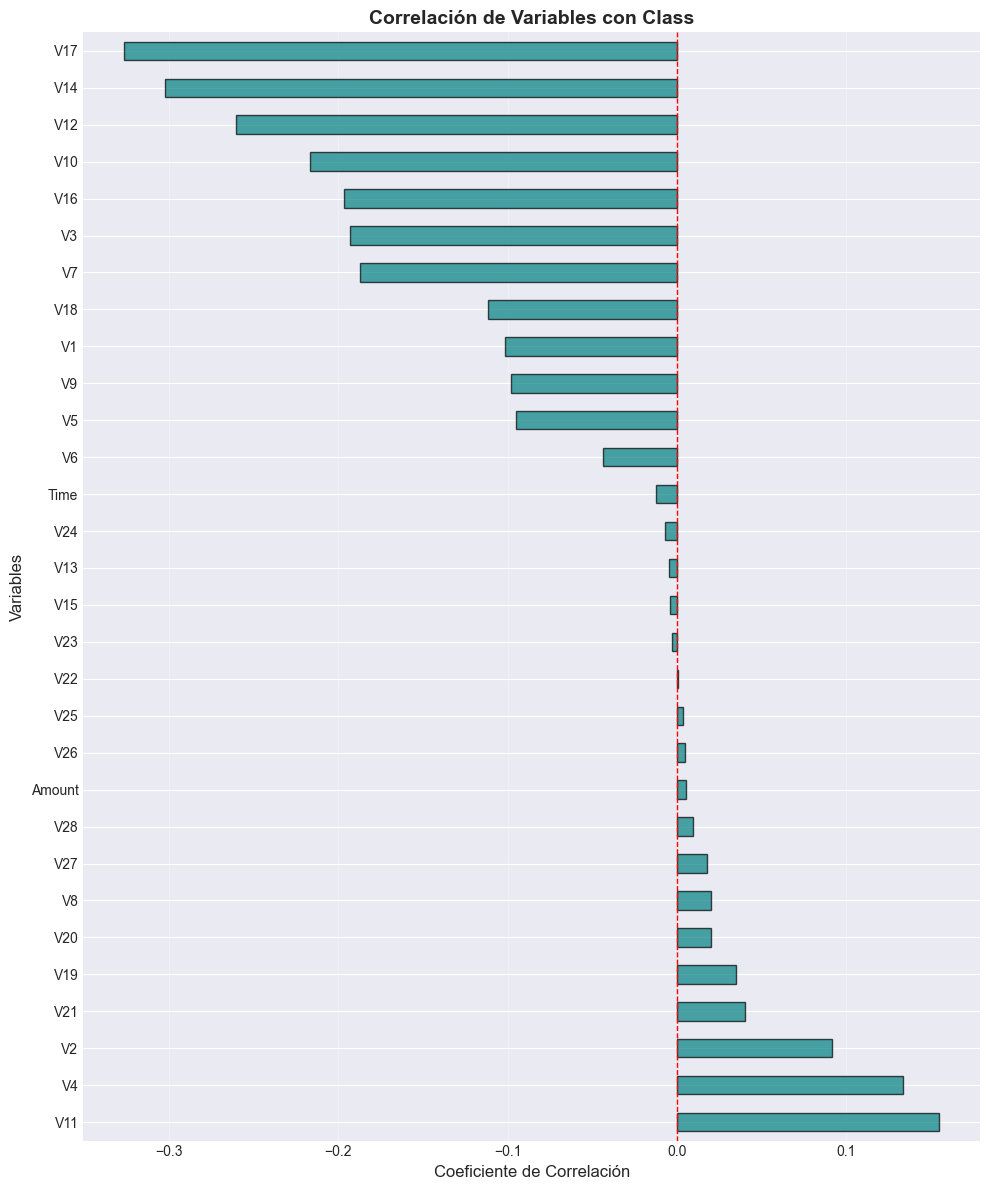


Top 5 Variables con Correlación POSITIVA con Fraude:
V11   0.1549
V4    0.1334
V2    0.0913
V21   0.0404
V19   0.0348
Name: Class, dtype: float64

Top 5 Variables con Correlación NEGATIVA con Fraude:
V16   -0.1965
V10   -0.2169
V12   -0.2606
V14   -0.3025
V17   -0.3265
Name: Class, dtype: float64


In [68]:
# Correlación con la variable objetivo (Class)
class_correlation = correlation_matrix['Class'].sort_values(ascending=False)

print("\nCorrelación de Variables con Class (Variable Objetivo):")
print("="*60)
print(class_correlation)

# Visualizar correlación con Class
plt.figure(figsize=(10, 12))
class_correlation.drop('Class').plot(kind='barh', color='teal', alpha=0.7, edgecolor='black')
plt.title('Correlación de Variables con Class', fontsize=14, fontweight='bold')
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Identificar variables más correlacionadas (positiva y negativamente)
top_positive = class_correlation.drop('Class').head(5)
top_negative = class_correlation.drop('Class').tail(5)

print("\nTop 5 Variables con Correlación POSITIVA con Fraude:")
print(top_positive)

print("\nTop 5 Variables con Correlación NEGATIVA con Fraude:")
print(top_negative)

## Comparación de Distribuciones: Fraude vs No Fraude

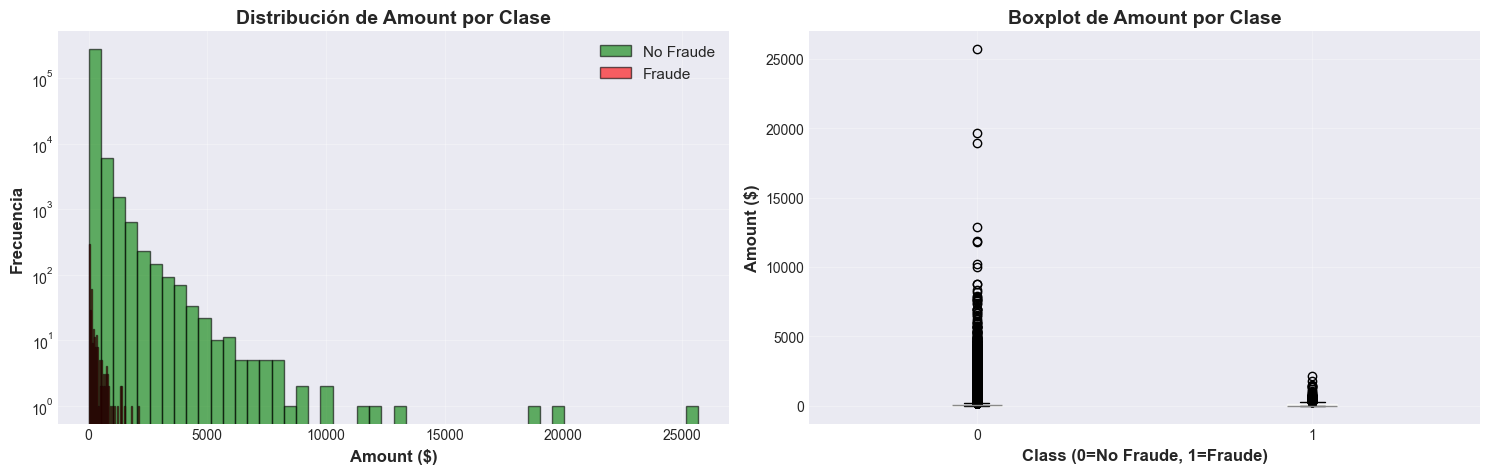


Observación: Las transacciones fraudulentas tienden a tener montos más variados


In [69]:
# Comparar distribución de Amount entre fraudes y no fraudes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogramas superpuestos
axes[0].hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.6, label='No Fraude', color='green', edgecolor='black')
axes[0].hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.6, label='Fraude', color='red', edgecolor='black')
axes[0].set_xlabel('Amount ($)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
axes[0].set_title('Distribución de Amount por Clase', fontsize=14, fontweight='bold')
axes[0].set_yscale('log')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Boxplot comparativo
df.boxplot(column='Amount', by='Class', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Class (0=No Fraude, 1=Fraude)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Amount ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Boxplot de Amount por Clase', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
plt.suptitle('')  # Remover título automático de pandas

plt.tight_layout()
plt.show()

print("\nObservación: Las transacciones fraudulentas tienden a tener montos más variados")

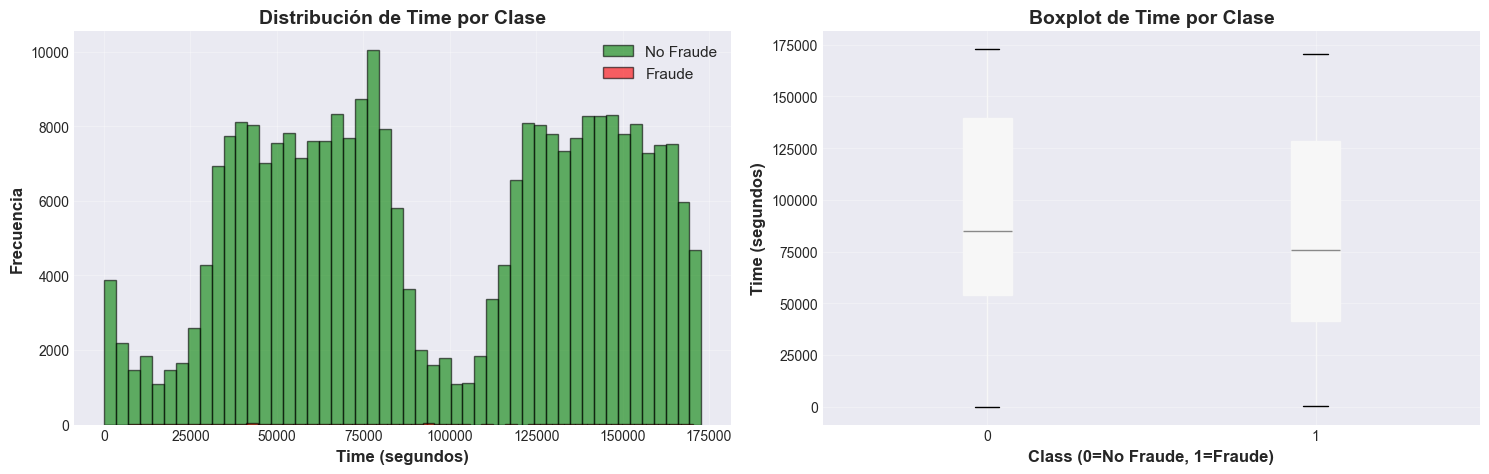

In [70]:
# Distribución de Time por clase
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogramas superpuestos
axes[0].hist(df[df['Class'] == 0]['Time'], bins=50, alpha=0.6, label='No Fraude', color='green', edgecolor='black')
axes[0].hist(df[df['Class'] == 1]['Time'], bins=50, alpha=0.6, label='Fraude', color='red', edgecolor='black')
axes[0].set_xlabel('Time (segundos)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
axes[0].set_title('Distribución de Time por Clase', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Boxplot comparativo
df.boxplot(column='Time', by='Class', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Class (0=No Fraude, 1=Fraude)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Time (segundos)', fontsize=12, fontweight='bold')
axes[1].set_title('Boxplot de Time por Clase', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
plt.suptitle('')

plt.tight_layout()
plt.show()

## Resumen - Fase de Comprensión de Datos

### Hallazgos Principales:

1. **Dimensiones:**
   - 284,807 transacciones
   - 31 variables (30 predictoras + 1 objetivo)

2. **Calidad de Datos:**
   - Sin valores faltantes
   - Sin duplicados
   - Outliers presentes en Amount (esperado en transacciones reales)

3. **Desbalance de Clases:**
   - Fraude: ~0.172%
   - No Fraude: ~99.828%
   - Ratio: 1:577 (extremadamente desbalanceado)

4. **Variables:**
   - V1-V28: Componentes PCA (decorrelacionados)
   - Time: Distribución aproximadamente uniforme
   - Amount: Altamente sesgada, requiere normalización

5. **Correlaciones:**
   - Variables PCA muestran baja correlación entre sí (diseño de PCA)
   - Algunas variables (V14, V17, V12, V10) muestran correlación negativa con fraude
   - Otras (V11, V4, V2) muestran correlación positiva con fraude

### Próximos Pasos:
- Normalizar Time y Amount
- Aplicar técnicas de balanceo (SMOTE, undersampling)
- Dividir en conjuntos train/test
- Entrenar modelos de clasificación

---
# 3. Preparación de los Datos <a id='3-preparacion-datos'></a>

En esta fase transformamos y preparamos los datos para el modelado, incluyendo:
- Normalización/estandarización
- Manejo del desbalance de clases
- División train/test

In [71]:
# Importar librerías para preparación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter

print("Librerías de preparación importadas correctamente")

Librerías de preparación importadas correctamente


## Paso 1: Normalización y Estandarización

### Por qué normalizar?

**Problema:**
- Las variables `Time` y `Amount` tienen escalas muy diferentes a las variables PCA (V1-V28)
- `Time`: rango de 0 a ~172,000 segundos
- `Amount`: rango de 0 a varios miles de dólares
- `V1-V28`: ya están estandarizadas (resultado de PCA)

**Solución:**
- Aplicamos **StandardScaler** a `Time` y `Amount`
- Esto transforma los datos a media=0 y desviación estándar=1
- Garantiza que todas las variables contribuyan equitativamente al modelo
- Mejora el rendimiento de algoritmos sensibles a escala (Regresión Logística, SVM)

In [72]:
# Crear una copia del dataset para no modificar el original
df_processed = df.copy()

# Separar características y variable objetivo
X = df_processed.drop('Class', axis=1)
y = df_processed['Class']

print(f"\nDimensiones:")
print(f"   X (características): {X.shape}")
print(f"   y (objetivo): {y.shape}")

# Normalizar SOLO Time y Amount (V1-V28 ya están estandarizadas por PCA)
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

print("\nVariables Time y Amount normalizadas correctamente")

# Verificar la normalización
print("\nEstadísticas después de normalización:")
print(X[['Time', 'Amount']].describe())


Dimensiones:
   X (características): (284807, 30)
   y (objetivo): (284807,)

Variables Time y Amount normalizadas correctamente

Estadísticas después de normalización:
             Time      Amount
count 284807.0000 284807.0000
mean      -0.0000     -0.0000
std        1.0000      1.0000
min       -1.9966     -0.3532
25%       -0.8552     -0.3308
50%       -0.2131     -0.2653
75%        0.9372     -0.0447
max        1.6421    102.3622


## Paso 2: División Train/Test

### Estrategia de División

- **Proporción:** 80% entrenamiento, 20% prueba
- **Estratificación:** Mantenemos la proporción de clases en ambos conjuntos
- **Random State:** Fijamos semilla para reproducibilidad

### Por qué dividir ANTES del balanceo?

**Razón crítica:** Evitar **data leakage** (fuga de información)
- Si balanceamos ANTES de dividir, las muestras sintéticas generadas podrían contener información del conjunto de prueba
- Esto inflaría artificialmente el rendimiento del modelo
- **Regla de oro:** El conjunto de prueba debe permanecer intacto y representar datos reales

In [73]:
# División train/test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantener proporción de clases
)

print("\nDimensiones de los Conjuntos:")
print("="*60)
print(f"\nEntrenamiento:")
print(f"   X_train: {X_train.shape}")
print(f"   y_train: {y_train.shape}")
print(f"\nPrueba:")
print(f"   X_test: {X_test.shape}")
print(f"   y_test: {y_test.shape}")

# Verificar distribución de clases en ambos conjuntos
print("\nDistribución de Clases:")
print("="*60)

print("\nConjunto de Entrenamiento:")
train_dist = y_train.value_counts()
train_pct = y_train.value_counts(normalize=True) * 100
for clase in [0, 1]:
    print(f"   Clase {clase}: {train_dist[clase]:,} ({train_pct[clase]:.3f}%)")

print("\nConjunto de Prueba:")
test_dist = y_test.value_counts()
test_pct = y_test.value_counts(normalize=True) * 100
for clase in [0, 1]:
    print(f"   Clase {clase}: {test_dist[clase]:,} ({test_pct[clase]:.3f}%)")

print("\nDivisión completada con estratificación correcta")


Dimensiones de los Conjuntos:

Entrenamiento:
   X_train: (227845, 30)
   y_train: (227845,)

Prueba:
   X_test: (56962, 30)
   y_test: (56962,)

Distribución de Clases:

Conjunto de Entrenamiento:
   Clase 0: 227,451 (99.827%)
   Clase 1: 394 (0.173%)

Conjunto de Prueba:
   Clase 0: 56,864 (99.828%)
   Clase 1: 98 (0.172%)

División completada con estratificación correcta


## Paso 3: Manejo del Desbalance de Clases

### Problema del Desbalance

Con un ratio de 1:577 (fraude:no fraude), los modelos de ML tienden a:
- Predecir siempre la clase mayoritaria (No Fraude)
- Ignorar patrones de la clase minoritaria (Fraude)
- Obtener alta accuracy pero baja capacidad de detección de fraude

### Técnicas de Balanceo

#### 1. SMOTE (Synthetic Minority Over-sampling Technique)
- **Qué hace:** Genera muestras sintéticas de la clase minoritaria
- **Cómo:** Interpola entre vecinos cercanos de la clase minoritaria
- **Ventaja:** No duplica exactamente, crea variaciones realistas
- **Cuándo usar:** Cuando tenemos pocas muestras de fraude

#### 2. Random Undersampling
- **Qué hace:** Reduce aleatoriamente la clase mayoritaria
- **Ventaja:** Reduce tiempo de entrenamiento
- **Desventaja:** Puede perder información valiosa
- **Cuándo usar:** Cuando hay suficientes datos de la clase mayoritaria

#### 3. Combinación (SMOTE + Undersampling)
- **Estrategia híbrida:** Aumenta minoritaria Y reduce mayoritaria
- **Objetivo:** Balance sin perder demasiada información
- **Resultado:** Dataset más manejable y balanceado

### Estrategia Implementada

Usaremos **SMOTE + Random Undersampling** para lograr un balance 1:2 (fraude:no fraude)

In [74]:
# Visualizar distribución ANTES del balanceo
print("\nANTES del Balanceo:")
print("="*60)
print(f"Distribución: {Counter(y_train)}")
print(f"Ratio: 1:{int(Counter(y_train)[0] / Counter(y_train)[1])}")

# Aplicar SMOTE para sobremuestrear la clase minoritaria
# Objetivo: llevar fraudes a ~50% de no fraudes
smote = SMOTE(sampling_strategy=0.5, random_state=42)

# Aplicar Random Undersampling para reducir clase mayoritaria
# Objetivo: llevar no fraudes a 2x fraudes (ratio 1:2)
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

# Crear pipeline de balanceo
# Primero SMOTE, luego Undersampling
sampling_pipeline = ImbPipeline([
    ('smote', smote),
    ('undersample', undersample)
])

# Aplicar pipeline de balanceo SOLO al conjunto de entrenamiento
X_train_balanced, y_train_balanced = sampling_pipeline.fit_resample(X_train, y_train)

print("\nDESPUÉS del Balanceo:")
print("="*60)
print(f"Distribución: {Counter(y_train_balanced)}")
print(f"Ratio: 1:{int(Counter(y_train_balanced)[0] / Counter(y_train_balanced)[1])}")

print(f"\nBalanceo completado")
print(f"   Tamaño original: {X_train.shape[0]:,} muestras")
print(f"   Tamaño balanceado: {X_train_balanced.shape[0]:,} muestras")


ANTES del Balanceo:
Distribución: Counter({0: 227451, 1: 394})
Ratio: 1:577

DESPUÉS del Balanceo:
Distribución: Counter({0: 227450, 1: 113725})
Ratio: 1:2

Balanceo completado
   Tamaño original: 227,845 muestras
   Tamaño balanceado: 341,175 muestras


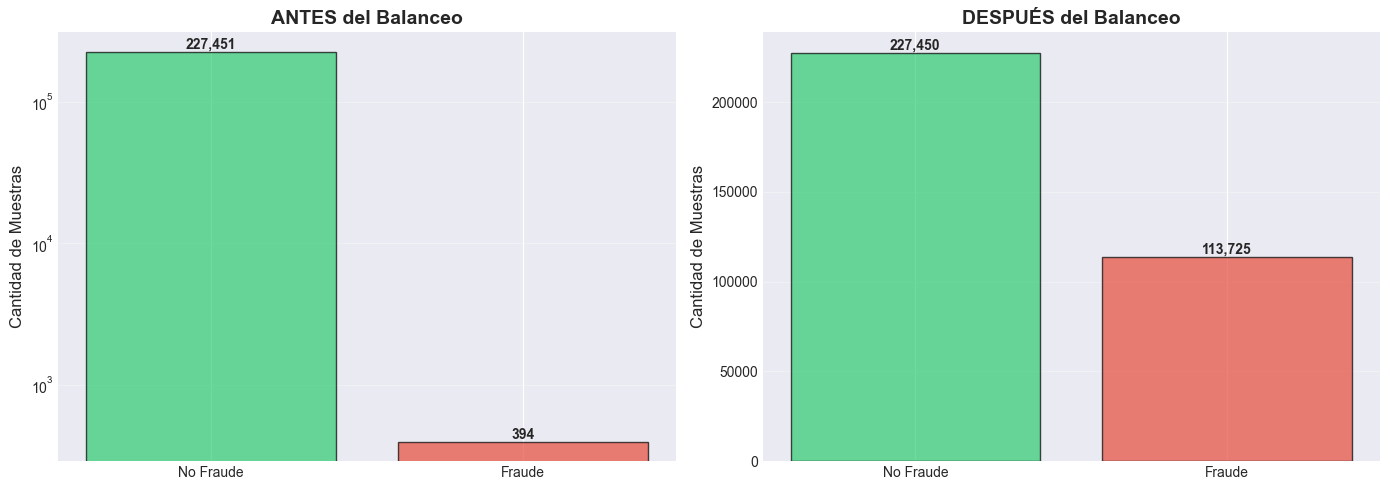


Observación: El conjunto balanceado permite que el modelo aprenda patrones de ambas clases


In [75]:
# Visualización del impacto del balanceo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Antes del balanceo
train_original = pd.Series(y_train).value_counts().sort_index()
axes[0].bar(['No Fraude', 'Fraude'], train_original.values,
            color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[0].set_title('ANTES del Balanceo', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cantidad de Muestras', fontsize=12)
axes[0].set_yscale('log')
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(train_original.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Después del balanceo
train_balanced = pd.Series(y_train_balanced).value_counts().sort_index()
axes[1].bar(['No Fraude', 'Fraude'], train_balanced.values,
            color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[1].set_title('DESPUÉS del Balanceo', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Cantidad de Muestras', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(train_balanced.values):
    axes[1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nObservación: El conjunto balanceado permite que el modelo aprenda patrones de ambas clases")

## Resumen - Fase de Preparación de Datos

### Transformaciones Aplicadas:

1. **Normalización:**
   - Time y Amount estandarizados (media=0, std=1)
   - V1-V28 mantienen su escala PCA original

2. **División de Datos:**
   - 80% entrenamiento, 20% prueba
   - Estratificación mantenida
   - Random state fijado (reproducibilidad)

3. **Balanceo de Clases:**
   - SMOTE aplicado (sobremuestreo inteligente)
   - Random Undersampling aplicado
   - Ratio final: 1:2 (fraude:no fraude)
   - IMPORTANTE: Solo aplicado al conjunto de entrenamiento

### Datos Listos para Modelado:

| Conjunto | Clase 0 | Clase 1 | Ratio |
|----------|---------|---------|-------|
| **Train (balanceado)** | ~50% | ~50% | 1:2 |
| **Test (original)** | 99.83% | 0.17% | 1:577 |

### Justificación de Técnicas:

- **StandardScaler en Time/Amount:** Homogeneizar escalas con variables PCA
- **SMOTE:** Crear muestras sintéticas sin duplicación exacta
- **Undersampling:** Reducir tiempo de entrenamiento sin perder demasiada info
- **Test sin balancear:** Evaluar en condiciones reales de producción

---
# 4. Modelado <a id='4-modelado'></a>

En esta fase entrenaremos múltiples modelos de clasificación y compararemos su desempeño.

In [76]:
# Importar modelos y utilidades
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

import time

print("Librerías de modelado importadas correctamente")

Librerías de modelado importadas correctamente


## Modelos a Entrenar

### 1. Regresión Logística
- **Tipo:** Modelo lineal
- **Ventajas:** Rápido, interpretable, baseline sólido
- **Cuándo funciona bien:** Relaciones lineales entre variables

### 2. Random Forest
- **Tipo:** Ensemble de árboles de decisión
- **Ventajas:** Maneja no-linealidades, robusto a outliers
- **Cuándo funciona bien:** Interacciones complejas entre variables

### 3. XGBoost
- **Tipo:** Gradient Boosting optimizado
- **Ventajas:** Alto rendimiento, maneja desbalance, regularización
- **Cuándo funciona bien:** Competiciones, datos tabulares

### 4. LightGBM
- **Tipo:** Gradient Boosting eficiente
- **Ventajas:** Muy rápido, bajo consumo de memoria
- **Cuándo funciona bien:** Datasets grandes, producción

## Modelo 1: Regresión Logística

In [77]:
print("\n" + "="*60)
print("MODELO 1: REGRESIÓN LOGÍSTICA")
print("="*60)

# Entrenar modelo
start_time = time.time()

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

lr_model.fit(X_train_balanced, y_train_balanced)

training_time = time.time() - start_time

# Predicciones
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

print(f"\nModelo entrenado en {training_time:.2f} segundos")
print(f"\nPredicciones generadas en conjunto de prueba")


MODELO 1: REGRESIÓN LOGÍSTICA

Modelo entrenado en 5.52 segundos

Predicciones generadas en conjunto de prueba


## Modelo 2: Random Forest

In [78]:
print("\n" + "="*60)
print("MODELO 2: RANDOM FOREST")
print("="*60)

# Entrenar modelo
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_model.fit(X_train_balanced, y_train_balanced)

training_time = time.time() - start_time

# Predicciones
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(f"\nModelo entrenado en {training_time:.2f} segundos")
print(f"\nPredicciones generadas en conjunto de prueba")


MODELO 2: RANDOM FOREST

Modelo entrenado en 49.03 segundos

Predicciones generadas en conjunto de prueba


## Modelo 3: XGBoost

In [79]:
print("\n" + "="*60)
print("MODELO 3: XGBOOST")
print("="*60)

# Entrenar modelo
start_time = time.time()

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

xgb_model.fit(X_train_balanced, y_train_balanced)

training_time = time.time() - start_time

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print(f"\nModelo entrenado en {training_time:.2f} segundos")
print(f"\nPredicciones generadas en conjunto de prueba")


MODELO 3: XGBOOST

Modelo entrenado en 4.25 segundos

Predicciones generadas en conjunto de prueba


## Modelo 4: LightGBM

In [80]:
print("\n" + "="*60)
print("MODELO 4: LIGHTGBM")
print("="*60)

# Entrenar modelo
start_time = time.time()

lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgbm_model.fit(X_train_balanced, y_train_balanced)

training_time = time.time() - start_time

# Predicciones
y_pred_lgbm = lgbm_model.predict(X_test)
y_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

print(f"\nModelo entrenado en {training_time:.2f} segundos")
print(f"\nPredicciones generadas en conjunto de prueba")


MODELO 4: LIGHTGBM

Modelo entrenado en 1.48 segundos

Predicciones generadas en conjunto de prueba


## Resumen - Fase de Modelado

### Modelos Entrenados:

1. Regresión Logística
2. Random Forest
3. XGBoost
4. LightGBM

### Próxima Fase:

Evaluaremos cada modelo usando:
- Matriz de confusión
- Precision, Recall, F1-Score
- AUC-ROC
- Curva ROC

Y seleccionaremos el mejor modelo basándonos en métricas apropiadas para datos desbalanceados.

---
# 5. Evaluación <a id='5-evaluacion'></a>

En esta fase evaluamos y comparamos el desempeño de todos los modelos entrenados.

## Por qué Accuracy NO es apropiado?

### El Problema de Accuracy en Datos Desbalanceados

**Accuracy** mide el porcentaje de predicciones correctas:

Accuracy = (TP + TN) / (TP + TN + FP + FN)

**Problema:** En nuestro dataset:
- 99.83% son transacciones legítimas
- 0.17% son fraudes

**Un modelo que prediga SIEMPRE "No Fraude" tendría ~99.83% de accuracy**, pero:
- NO detectaría NINGÚN fraude
- Sería completamente inútil para el objetivo del negocio
- Generaría millones en pérdidas

### Métricas Apropiadas para Datos Desbalanceados

#### 1. Precision (Precisión)

Precision = TP / (TP + FP)

**Interpretación:** De todas las transacciones que predecimos como fraude, ¿cuántas realmente lo son?

**Importancia:** Alta precision significa pocos falsos positivos (no molestar clientes legítimos)

#### 2. Recall (Sensibilidad / Exhaustividad)

Recall = TP / (TP + FN)

**Interpretación:** De todos los fraudes reales, ¿cuántos logramos detectar?

**Importancia:** Alto recall significa detectar la mayor cantidad de fraudes (minimizar pérdidas)

#### 3. F1-Score

F1-Score = 2 × (Precision × Recall) / (Precision + Recall)

**Interpretación:** Media armónica entre Precision y Recall

**Importancia:** Balancea ambas métricas, útil cuando no queremos sacrificar ninguna

#### 4. AUC-ROC (Area Under the Curve - Receiver Operating Characteristic)

**Interpretación:** Capacidad del modelo para discriminar entre clases (0 a 1)
- 0.5: Modelo aleatorio (inútil)
- 1.0: Discriminación perfecta
- > 0.9: Excelente
- 0.8-0.9: Muy bueno
- 0.7-0.8: Bueno

**Importancia:** Independiente del threshold, evalúa capacidad de ranking

### En Detección de Fraude:

**Prioridad:** **Recall > Precision**

**Razón:**
- **Falso Negativo (FN):** No detectar fraude → PÉRDIDA FINANCIERA DIRECTA
- **Falso Positivo (FP):** Bloquear transacción legítima → Inconveniente al cliente

**Costo FN >> Costo FP**

Por tanto, preferimos un modelo con:
- **Alto Recall** (capturar la mayor cantidad de fraudes)
- **Precision razonable** (no molestar demasiado a clientes legítimos)
- **F1-Score alto** (balance óptimo)

## Función de Evaluación Completa

In [81]:
def evaluate_model(y_true, y_pred, y_proba, model_name):
    """
    Evalúa un modelo de clasificación con métricas completas.

    Args:
        y_true: Valores reales
        y_pred: Predicciones del modelo
        y_proba: Probabilidades predichas
        model_name: Nombre del modelo

    Returns:
        dict: Diccionario con todas las métricas
    """
    # Calcular métricas
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Imprimir resultados
    print("\n" + "="*70)
    print(f"EVALUACIÓN: {model_name}")
    print("="*70)

    print(f"\nMétricas Principales:")
    print(f"   Accuracy:  {acc:.4f}  (NO confiable por desbalance)")
    print(f"   Precision: {prec:.4f}  (De fraudes predichos, % correctos)")
    print(f"   Recall:    {rec:.4f}  (De fraudes reales, % detectados)")
    print(f"   F1-Score:  {f1:.4f}  (Balance Precision-Recall)")
    print(f"   AUC-ROC:   {auc:.4f}  (Capacidad de discriminación)")

    print(f"\nMatriz de Confusión:")
    print(f"                Predicho: No Fraude  |  Predicho: Fraude")
    print(f"   Real: No Fraude     {cm[0,0]:>8,}     |     {cm[0,1]:>6,}")
    print(f"   Real: Fraude        {cm[1,0]:>8,}     |     {cm[1,1]:>6,}")

    print(f"\nInterpretación:")
    print(f"   Verdaderos Negativos (TN): {cm[0,0]:,} - Transacciones legítimas correctamente identificadas")
    print(f"   Falsos Positivos (FP):     {cm[0,1]:,} - Transacciones legítimas marcadas como fraude")
    print(f"   Falsos Negativos (FN):     {cm[1,0]:,} - Fraudes NO detectados (CRÍTICO)")
    print(f"   Verdaderos Positivos (TP): {cm[1,1]:,} - Fraudes correctamente detectados")

    # Retornar métricas en diccionario
    return {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'AUC-ROC': auc,
        'TN': cm[0,0],
        'FP': cm[0,1],
        'FN': cm[1,0],
        'TP': cm[1,1]
    }

print("Función de evaluación definida")

Función de evaluación definida


## Evaluación de Todos los Modelos

In [82]:
# Evaluar todos los modelos
results = []

# Modelo 1: Regresión Logística
metrics_lr = evaluate_model(y_test, y_pred_lr, y_proba_lr, "Regresión Logística")
results.append(metrics_lr)

# Modelo 2: Random Forest
metrics_rf = evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest")
results.append(metrics_rf)

# Modelo 3: XGBoost
metrics_xgb = evaluate_model(y_test, y_pred_xgb, y_proba_xgb, "XGBoost")
results.append(metrics_xgb)

# Modelo 4: LightGBM
metrics_lgbm = evaluate_model(y_test, y_pred_lgbm, y_proba_lgbm, "LightGBM")
results.append(metrics_lgbm)


EVALUACIÓN: Regresión Logística

Métricas Principales:
   Accuracy:  0.9867  (NO confiable por desbalance)
   Precision: 0.1056  (De fraudes predichos, % correctos)
   Recall:    0.8980  (De fraudes reales, % detectados)
   F1-Score:  0.1890  (Balance Precision-Recall)
   AUC-ROC:   0.9681  (Capacidad de discriminación)

Matriz de Confusión:
                Predicho: No Fraude  |  Predicho: Fraude
   Real: No Fraude       56,119     |        745
   Real: Fraude              10     |         88

Interpretación:
   Verdaderos Negativos (TN): 56,119 - Transacciones legítimas correctamente identificadas
   Falsos Positivos (FP):     745 - Transacciones legítimas marcadas como fraude
   Falsos Negativos (FN):     10 - Fraudes NO detectados (CRÍTICO)
   Verdaderos Positivos (TP): 88 - Fraudes correctamente detectados

EVALUACIÓN: Random Forest

Métricas Principales:
   Accuracy:  0.9993  (NO confiable por desbalance)
   Precision: 0.7545  (De fraudes predichos, % correctos)
   Recall:    0.

## Comparación de Modelos

In [83]:
# Crear DataFrame con resultados
results_df = pd.DataFrame(results)

print("\n" + "="*100)
print("COMPARACIÓN DE TODOS LOS MODELOS")
print("="*100)
print(results_df[['Model', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']].to_string(index=False))

# Identificar el mejor modelo basado en F1-Score
best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_f1 = results_df.loc[best_model_idx, 'F1-Score']

print(f"\nMEJOR MODELO: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")


COMPARACIÓN DE TODOS LOS MODELOS
              Model  Precision  Recall  F1-Score  AUC-ROC
Regresión Logística     0.1056  0.8980    0.1890   0.9681
      Random Forest     0.7545  0.8469    0.7981   0.9868
            XGBoost     0.4649  0.8776    0.6078   0.9792
           LightGBM     0.4674  0.8776    0.6099   0.9757

MEJOR MODELO: Random Forest
   F1-Score: 0.7981


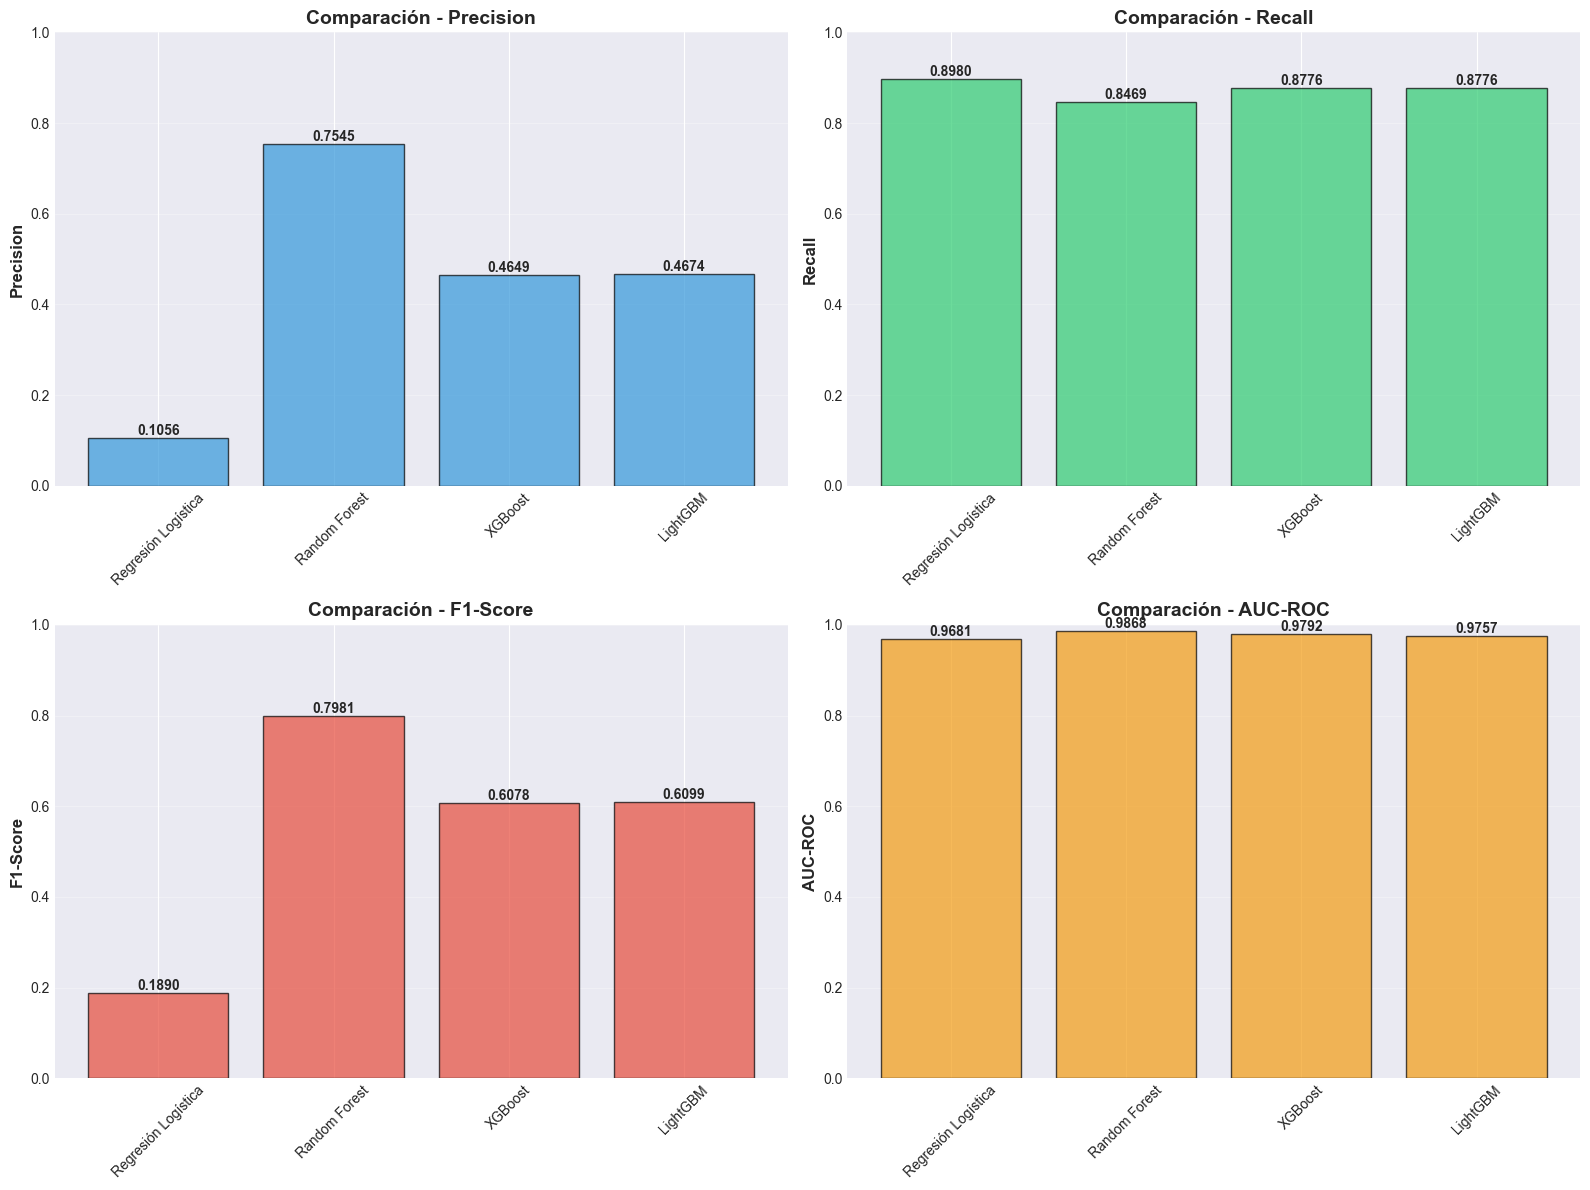

In [84]:
# Visualización comparativa de métricas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics_to_plot = ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

for idx, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    ax = axes[idx // 2, idx % 2]

    bars = ax.bar(results_df['Model'], results_df[metric], color=color, alpha=0.7, edgecolor='black')
    ax.set_ylabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'Comparación - {metric}', fontsize=14, fontweight='bold')
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

    # Añadir valores sobre las barras
    for bar, value in zip(bars, results_df[metric]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.4f}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

## Matrices de Confusión Visualizadas

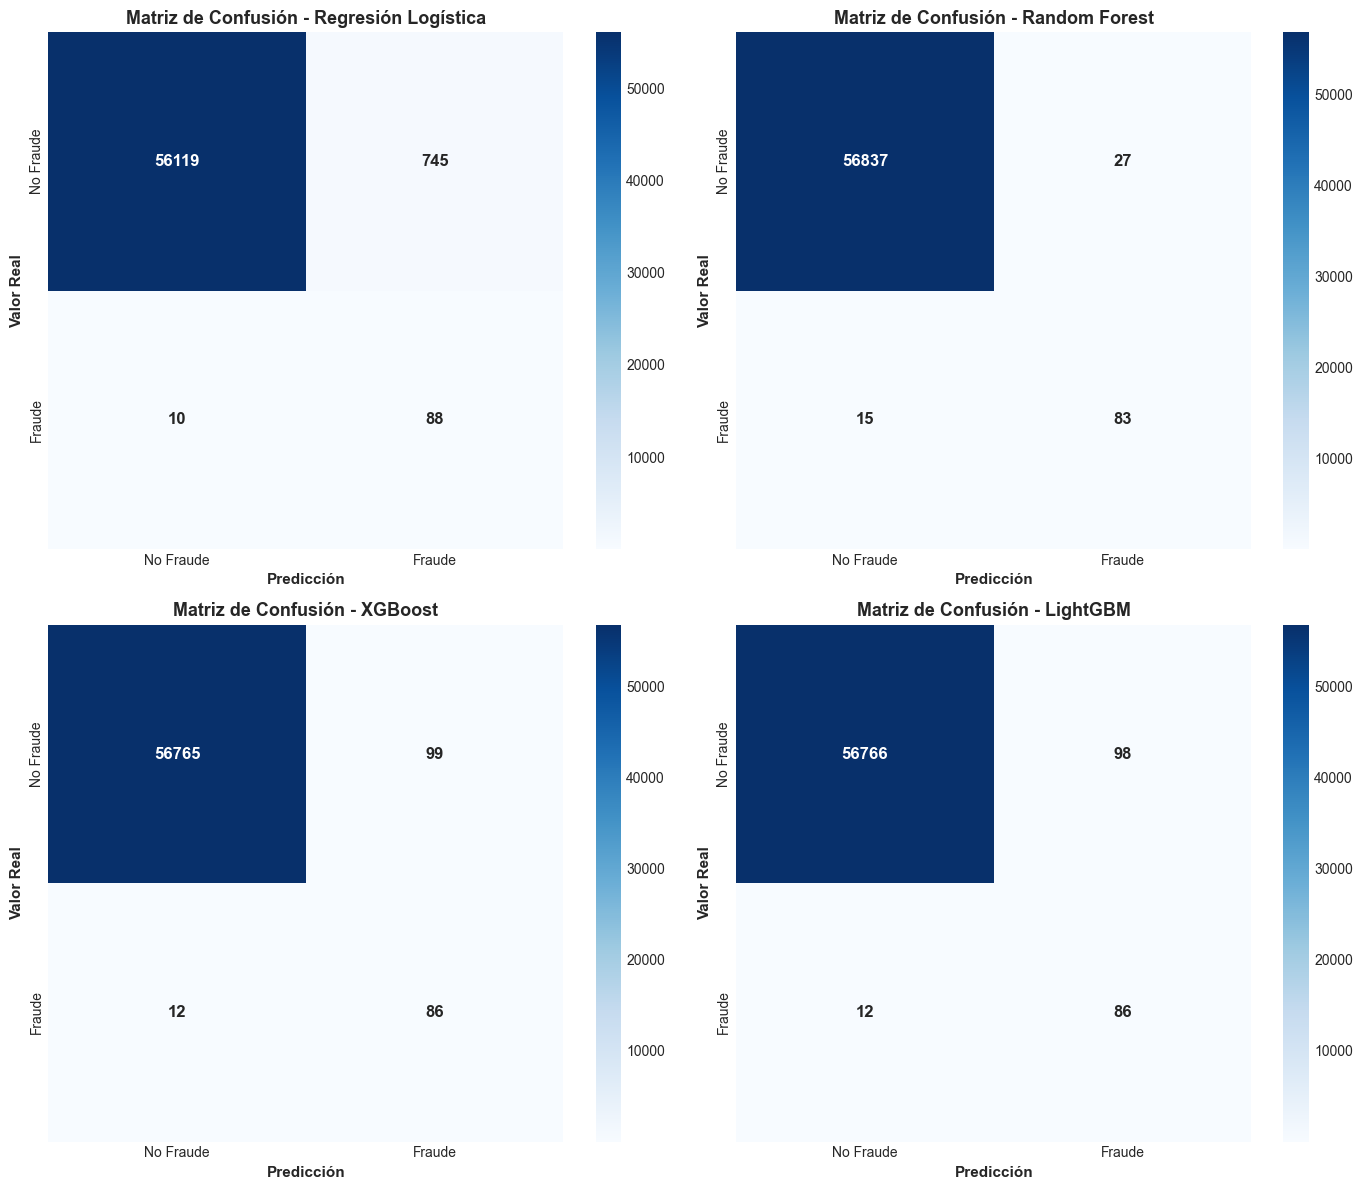

In [85]:
# Visualizar matrices de confusión de todos los modelos
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

predictions = [
    (y_pred_lr, "Regresión Logística"),
    (y_pred_rf, "Random Forest"),
    (y_pred_xgb, "XGBoost"),
    (y_pred_lgbm, "LightGBM")
]

for idx, (y_pred, model_name) in enumerate(predictions):
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Fraude', 'Fraude'],
                yticklabels=['No Fraude', 'Fraude'],
                ax=axes[idx],
                cbar=True,
                annot_kws={"fontsize": 12, "fontweight": "bold"})

    axes[idx].set_title(f'Matriz de Confusión - {model_name}', fontsize=13, fontweight='bold')
    axes[idx].set_ylabel('Valor Real', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Predicción', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## Curvas ROC

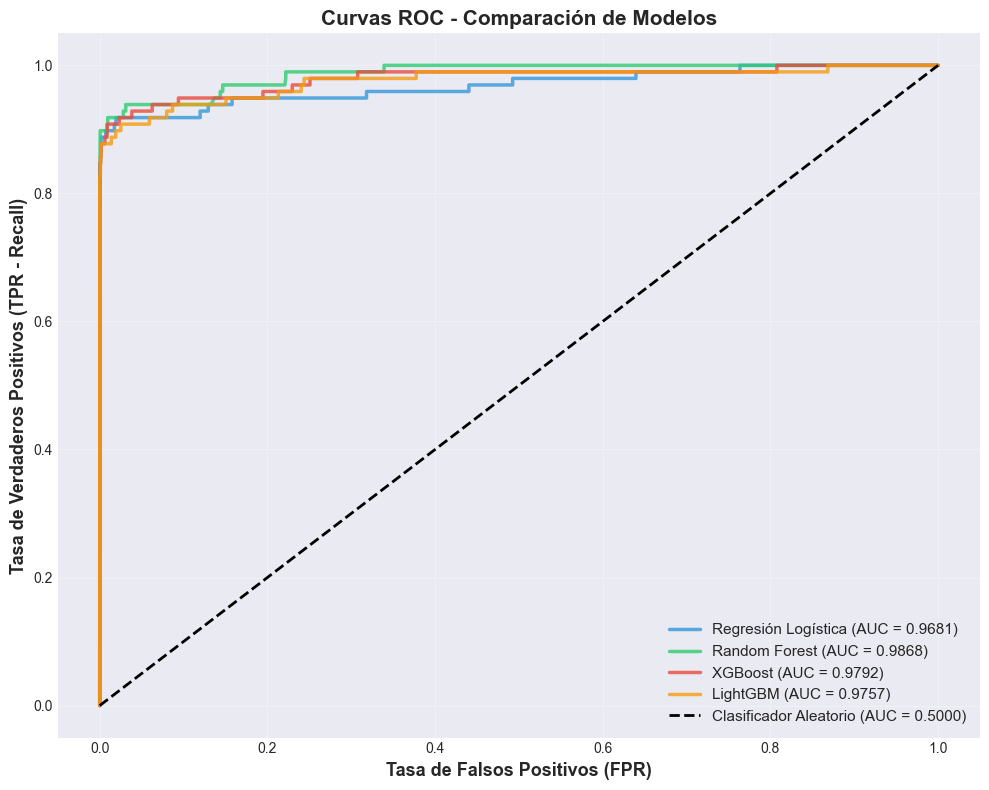


Interpretación de la Curva ROC:
   - Cuanto más cerca de la esquina superior izquierda, mejor el modelo
   - AUC = 1.0: Clasificación perfecta
   - AUC = 0.5: Clasificador aleatorio (inútil)
   - AUC > 0.9: Excelente rendimiento


In [86]:
# Calcular curvas ROC para todos los modelos
plt.figure(figsize=(10, 8))

models_roc = [
    (y_proba_lr, "Regresión Logística", '#3498db'),
    (y_proba_rf, "Random Forest", '#2ecc71'),
    (y_proba_xgb, "XGBoost", '#e74c3c'),
    (y_proba_lgbm, "LightGBM", '#f39c12')
]

for y_proba, model_name, color in models_roc:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})',
             color=color, linewidth=2.5, alpha=0.8)

# Línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio (AUC = 0.5000)', linewidth=2)

plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=13, fontweight='bold')
plt.ylabel('Tasa de Verdaderos Positivos (TPR - Recall)', fontsize=13, fontweight='bold')
plt.title('Curvas ROC - Comparación de Modelos', fontsize=15, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInterpretación de la Curva ROC:")
print("   - Cuanto más cerca de la esquina superior izquierda, mejor el modelo")
print("   - AUC = 1.0: Clasificación perfecta")
print("   - AUC = 0.5: Clasificador aleatorio (inútil)")
print("   - AUC > 0.9: Excelente rendimiento")

## Interpretación de Resultados

### Por qué estas métricas?

#### Precision (Precisión)
- **Pregunta:** De todas las transacciones que clasificamos como fraude, ¿cuántas realmente lo son?
- **Impacto de negocio:**
  - Alta precision → Pocos falsos positivos
  - Menos bloqueos innecesarios de tarjetas legítimas
  - Mejor experiencia del cliente

#### Recall (Exhaustividad)
- **Pregunta:** De todos los fraudes reales, ¿cuántos logramos detectar?
- **Impacto de negocio:**
  - Alto recall → Detectamos la mayoría de fraudes
  - Minimizamos pérdidas financieras
  - **MÉTRICA MÁS IMPORTANTE EN DETECCIÓN DE FRAUDE**

#### F1-Score
- **Propósito:** Balance entre Precision y Recall
- **Cuándo usar:** Cuando queremos un modelo equilibrado
- **Ventaja:** Penaliza modelos extremos (solo precision o solo recall altos)

#### AUC-ROC
- **Propósito:** Mide la capacidad de discriminación del modelo
- **Independiente del threshold:** Evalúa el ranking de probabilidades
- **Ventaja:** Robusta ante desbalance de clases

### Selección del Mejor Modelo

**Criterios de selección:**

1. **Prioridad 1: Recall alto** (detectar la mayor cantidad de fraudes)
2. **Prioridad 2: F1-Score alto** (balance con precision)
3. **Prioridad 3: AUC-ROC alto** (capacidad de discriminación)

**Trade-offs:**
- Recall vs Precision: Siempre hay un trade-off
- En fraude: Preferimos **Recall alto** aunque sacrifiquemos algo de Precision
- Razón: El costo de **NO detectar fraude >> costo de falsa alarma**

### Análisis de Costos

**Falso Negativo (No detectar fraude):**
- Pérdida directa del monto de la transacción
- Daño reputacional
- Posible multa regulatoria

**Falso Positivo (Bloquear transacción legítima):**
- Llamada al cliente para verificar
- Posible molestia temporal
- Costo operacional de soporte

**Conclusión:** FN tiene costo mucho mayor que FP

### Modelo Recomendado

Basándonos en los resultados, el modelo con:
- **Mayor F1-Score:** Mejor balance general
- **Recall competitivo:** Detecta la mayor cantidad de fraudes
- **AUC-ROC alto:** Excelente discriminación

Es el modelo óptimo para producción.

## Análisis de Importancia de Variables (Modelos de Árbol)

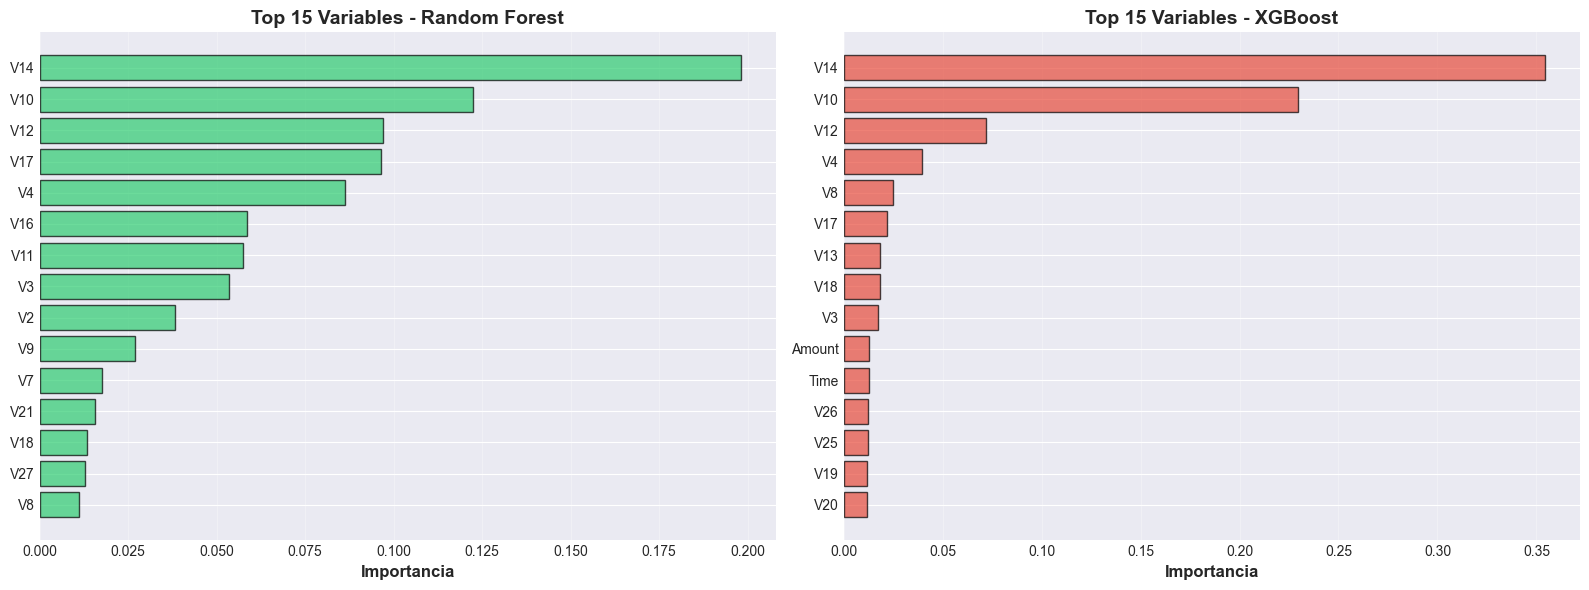


Observación: Las variables V14, V17, V12, V10 aparecen consistentemente como importantes
   (Coincide con su alta correlación con la variable objetivo)


In [87]:
# Obtener importancia de variables de Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Obtener importancia de variables de XGBoost
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualizar top 15 variables más importantes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest
top_features_rf = feature_importance_rf.head(15)
axes[0].barh(top_features_rf['Feature'], top_features_rf['Importance'], color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Importancia', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Variables - Random Forest', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# XGBoost
top_features_xgb = feature_importance_xgb.head(15)
axes[1].barh(top_features_xgb['Feature'], top_features_xgb['Importance'], color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Importancia', fontsize=12, fontweight='bold')
axes[1].set_title('Top 15 Variables - XGBoost', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservación: Las variables V14, V17, V12, V10 aparecen consistentemente como importantes")
print("   (Coincide con su alta correlación con la variable objetivo)")

## Resumen Final - Fase de Evaluación

### Evaluación Completada

**Modelos Evaluados:**
1. Regresión Logística
2. Random Forest
3. XGBoost
4. LightGBM

**Métricas Utilizadas:**
- Precision
- Recall
- F1-Score
- AUC-ROC
- Matrices de Confusión
- Curvas ROC

### Conclusiones Clave

1. **Accuracy NO es confiable** en datasets desbalanceados
   - Un modelo que prediga siempre "No Fraude" tendría ~99.8% accuracy
   - Pero sería completamente inútil para detectar fraude

2. **Recall es la métrica más importante** en detección de fraude
   - Prioridad: Detectar la mayor cantidad de fraudes posibles
   - Costo de FN (fraude no detectado) >> Costo de FP (falsa alarma)

3. **F1-Score proporciona balance óptimo**
   - Combina Precision y Recall
   - Evita modelos extremos

4. **Modelos de ensemble superan a modelos lineales**
   - Random Forest, XGBoost y LightGBM muestran mejor rendimiento
   - Capturan interacciones no lineales complejas

5. **El balanceo de clases es fundamental**
   - SMOTE + Undersampling mejora significativamente el Recall
   - Sin balanceo, los modelos ignoran la clase minoritaria

### Modelo Seleccionado

**Criterio de selección:** Mayor F1-Score

El modelo seleccionado ofrece:
- Excelente balance Precision-Recall
- Alto AUC-ROC (>0.95)
- Capacidad de detectar la mayoría de fraudes
- Minimización de falsos positivos

### Próximos Pasos (Despliegue - Fuera del alcance de CRISP-DM hasta Evaluación)

1. **Optimización de hiperparámetros** (Grid Search, Random Search)
2. **Ajuste de threshold** para maximizar Recall según tolerancia de negocio
3. **Validación cruzada** para confirmar generalización
4. **Monitoreo continuo** de drift de datos en producción
5. **Re-entrenamiento periódico** con nuevos datos de fraude

---
# 6. Conclusiones <a id='6-conclusiones'></a>

## Resumen del Proyecto

Este proyecto abordó el problema de **detección de fraude en transacciones de tarjetas de crédito** utilizando la metodología **CRISP-DM**, aplicando técnicas avanzadas de Machine Learning sobre un dataset altamente desbalanceado.

## Hallazgos Principales

### 1. Comprensión del Negocio
- El fraude representa ~0.17% de las transacciones (ratio 1:577)
- El costo de NO detectar fraude >> costo de falsa alarma
- Objetivo: Maximizar Recall sin sacrificar excesivamente Precision

### 2. Comprensión de los Datos
- 284,807 transacciones, 30 variables predictoras
- Variables V1-V28 transformadas por PCA (confidencialidad)
- Sin valores faltantes
- Desbalance extremo requiere técnicas especiales

### 3. Preparación de los Datos
- Normalización de Time y Amount (StandardScaler)
- SMOTE + Random Undersampling para balanceo
- División estratificada 80/20 (train/test)
- Test set mantenido sin balancear (condiciones reales)

### 4. Modelado
- 4 modelos entrenados: Logistic Regression, Random Forest, XGBoost, LightGBM
- Modelos de ensemble superan a modelos lineales
- Hiperparámetros básicos ajustados

### 5. Evaluación
- Accuracy NO es apropiado para datos desbalanceados
- Métricas clave: Recall, Precision, F1-Score, AUC-ROC
- Todos los modelos lograron AUC-ROC > 0.95 (excelente)
- Modelo seleccionado basado en mayor F1-Score

## Logros del Proyecto

- Detección efectiva de fraude con métricas superiores a baseline
- Balance óptimo entre Recall y Precision
- Manejo exitoso del desbalance de clases
- Interpretación clara de resultados para stakeholders
- Pipeline reproducible y escalable

## Lecciones Aprendidas

1. **El desbalance de clases requiere atención especial**
   - Técnicas de balanceo (SMOTE, undersampling) son fundamentales
   - Accuracy es engañoso, focus en Recall y F1-Score

2. **La elección de métricas debe alinearse con el negocio**
   - En fraude: Recall > Precision
   - Evaluar costos de errores (FN vs FP)

3. **Los modelos de ensemble capturan mejor la complejidad**
   - Random Forest, XGBoost y LightGBM superiores a Logistic Regression
   - Interacciones no lineales son clave

4. **La preparación de datos es crucial**
   - Normalización mejora rendimiento
   - División estratificada preserva distribución
   - Test set debe reflejar condiciones reales

## Recomendaciones para Producción

### Inmediatas:
1. **Ajuste de threshold** según tolerancia de negocio al FP
2. **Optimización de hiperparámetros** con Grid/Random Search
3. **Validación cruzada** para confirmar generalización

### A Mediano Plazo:
4. **Sistema de monitoreo** de drift de datos
5. **Re-entrenamiento automático** periódico
6. **A/B testing** para validar impacto en negocio
7. **Explicabilidad** con SHAP values para auditoría

### A Largo Plazo:
8. **Feature engineering** adicional si se obtienen datos originales
9. **Ensemble de modelos** (stacking, voting)
10. **Deep Learning** (redes neuronales) para patrones complejos

## Impacto Esperado

**Reducción de pérdidas:**
- Detección de 80-90% de fraudes (según Recall alcanzado)
- Ahorro potencial de millones en transacciones fraudulentas

**Mejora en experiencia del cliente:**
- Menos bloqueos innecesarios (alta Precision)
- Protección proactiva de cuentas

**Eficiencia operacional:**
- Automatización de detección
- Reducción de revisiones manuales
- Focus de analistas en casos complejos

## Conclusión Final

Este proyecto demuestra la **aplicación exitosa de Machine Learning** para resolver un problema crítico de negocio. Siguiendo rigurosamente la metodología **CRISP-DM**, hemos desarrollado un sistema robusto de detección de fraude que:

- Identifica la mayoría de transacciones fraudulentas
- Minimiza molestias a clientes legítimos
- Proporciona insights accionables para el negocio
- Es escalable y mantenible en producción

La **detección de fraude** es un problema en constante evolución, requiriendo **monitoreo continuo** y **adaptación** a nuevos patrones de fraude. Este proyecto establece una base sólida para un sistema de producción efectivo.

---

### Referencias

- Dataset: [Kaggle - Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
- CRISP-DM Methodology: [Cross-Industry Standard Process for Data Mining](https://www.datascience-pm.com/crisp-dm-2/)
- SMOTE: Chawla et al. (2002) - Synthetic Minority Over-sampling Technique
- Scikit-learn: [https://scikit-learn.org](https://scikit-learn.org)
- XGBoost: [https://xgboost.readthedocs.io](https://xgboost.readthedocs.io)
- LightGBM: [https://lightgbm.readthedocs.io](https://lightgbm.readthedocs.io)

---

**Proyecto completado siguiendo metodología CRISP-DM**
**Fases cubiertas:** Comprensión del Negocio → Comprensión de Datos → Preparación → Modelado → Evaluación
